In [1]:
using ThreeBodyProblem
using DifferentialEquations
using Plots

In [2]:
μ₁ = 398600 # {km³/s²} gravitational parameter of Earth
μ₂ = 4903   # {km³/s²} gravitational parameter of the Moon
d = 384400  # {km} average distance between Earth and the Moon
p = [μ₁, μ₂, d];

In [5]:
R₁,R₂ = computeR1R2(p)
ωₛ = sqrt((μ₁ + μ₂)/d^3);

In [6]:
Rₑ = 6378.0 # {km} radius of the Earth
Rₘ = 1738.0 # {km} radius of the Moon
h = 200.0   # {km} altitude of parking orbit

200.0

In [8]:
L1 = computeL1(p)

3-element Vector{Float64}:
 321709.2262741427
      0.0
      0.0

In [9]:
vᵢ₀ = 10.92367104   # {km/s} synodic frame injection velocity
ϕ₀ = 47.70061087    # {°}

47.70061087

In [10]:
vᵢ = vᵢ₀
ϕ = ϕ₀

47.70061087

In [11]:
r₀ = [-R₁ - (Rₑ + 200)*cosd(ϕ); -(Rₑ + 200)*sind(ϕ); 0]
v₀ = vᵢ*[sind(ϕ); -cosd(ϕ); 0];
rv₀ = [r₀;v₀]

6-element Vector{Float64}:
 -9097.902229126237
 -4865.340542620438
     0.0
     8.07956515432666
    -7.3516811619605145
     0.0

In [12]:
tspan = [0.,86400*3] # 3 days

2-element Vector{Float64}:
      0.0
 259200.0

In [13]:
prob = ODEProblem(CR3BPdynamics!,rv₀,tspan,p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 259200.0)
u0: 6-element Vector{Float64}:
 -9097.902229126237
 -4865.340542620438
     0.0
     8.07956515432666
    -7.3516811619605145
     0.0

In [14]:
sol = solve(prob,reltol=1e-6)

retcode: Success
Interpolation: automatic order switching interpolation
t: 63-element Vector{Float64}:
      0.0
      0.19809124672090112
      2.1790037139299123
     21.988128386020023
     92.77461470805856
    196.7043039570584
    313.6636843185568
    448.23790898542336
    597.2038653797815
    763.4087564317639
    948.2699141866774
   1155.8096023048467
   1390.208209270991
      ⋮
 250193.1903756447
 250567.1485086943
 250947.62449937468
 251376.4833018127
 251875.10088849516
 252477.9995801016
 253188.6503436455
 254029.11482569732
 255034.21515564958
 256245.4769283483
 257715.77994655704
 259200.0
u: 63-element Vector{Vector{Float64}}:
 [-9097.902229126237, -4865.340542620438, 0.0, 8.07956515432666, -7.3516811619605145, 0.0]
 [-9096.301617138297, -4866.796713458758, 0.0, 8.08078526123043, -7.350339808469269, 0.0]
 [-9080.282221079302, -4881.343792449304, 0.0, 8.092961930809905, -7.336904188970452, 0.0]
 [-8918.778804007976, -5025.335775285335, 0.0, 8.212236452245596, -7.2

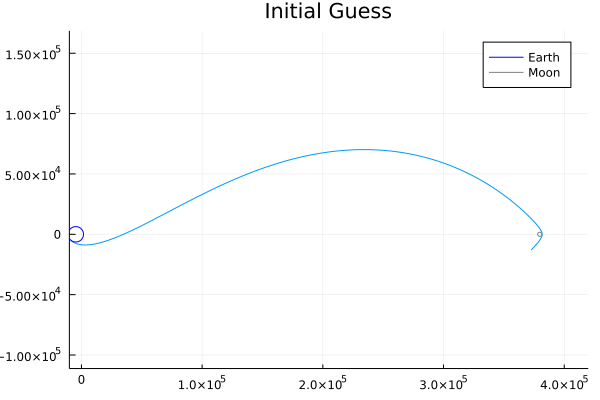

In [18]:
plot(sol,vars=(1,2),title="Initial Guess",label="")
# scatter!(L1[1],L1[2],marker="x")
plot!(circle(Rₑ,[-R₁;0]),color="blue",label="Earth")
plot!(circle(Rₘ,[R₂;0]),color="gray",label="Moon",aspect_ratio=1)